<a href="https://colab.research.google.com/github/SiyagJatin/Dog_cat_classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
#!/bin/bash
!kaggle datasets download shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 98% 774M/788M [00:06<00:00, 110MB/s] 
100% 788M/788M [00:06<00:00, 120MB/s]


In [3]:
import zipfile
zip_ref =zipfile.ZipFile('/content/microsoft-catsvsdogs-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
data_dir='/content/PetImages'

In [6]:
image_exts=['jpg','jpeg','png','bmp']
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      with Image.open(image_path) as img:
        tip = img.format.lower()
      if tip not in image_exts:
        print('image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      tip = None
      print('Issue with image {}'.format(image_path))
      #os.remove(image_path)

image not in ext list /content/PetImages/Cat/4833.jpg
Issue with image /content/PetImages/Cat/666.jpg
image not in ext list /content/PetImages/Cat/9778.jpg
image not in ext list /content/PetImages/Cat/11874.jpg
image not in ext list /content/PetImages/Cat/9565.jpg
Issue with image /content/PetImages/Cat/Thumbs.db
image not in ext list /content/PetImages/Cat/7968.jpg
image not in ext list /content/PetImages/Cat/3491.jpg
image not in ext list /content/PetImages/Cat/2663.jpg
image not in ext list /content/PetImages/Cat/11935.jpg
image not in ext list /content/PetImages/Cat/5553.jpg
image not in ext list /content/PetImages/Cat/10404.jpg
image not in ext list /content/PetImages/Cat/7978.jpg
image not in ext list /content/PetImages/Cat/11565.jpg
image not in ext list /content/PetImages/Cat/850.jpg
image not in ext list /content/PetImages/Cat/3300.jpg
image not in ext list /content/PetImages/Cat/936.jpg
image not in ext list /content/PetImages/Cat/10125.jpg
image not in ext list /content/PetI

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


image not in ext list /content/PetImages/Dog/3136.jpg
image not in ext list /content/PetImages/Dog/10158.jpg
image not in ext list /content/PetImages/Dog/3288.jpg
Issue with image /content/PetImages/Dog/Thumbs.db
image not in ext list /content/PetImages/Dog/7133.jpg
image not in ext list /content/PetImages/Dog/1308.jpg
image not in ext list /content/PetImages/Dog/8730.jpg
image not in ext list /content/PetImages/Dog/10797.jpg
image not in ext list /content/PetImages/Dog/5604.jpg
image not in ext list /content/PetImages/Dog/4367.jpg
image not in ext list /content/PetImages/Dog/11853.jpg
image not in ext list /content/PetImages/Dog/2688.jpg
image not in ext list /content/PetImages/Dog/10747.jpg
image not in ext list /content/PetImages/Dog/7969.jpg
image not in ext list /content/PetImages/Dog/7459.jpg
image not in ext list /content/PetImages/Dog/11675.jpg
image not in ext list /content/PetImages/Dog/9188.jpg
image not in ext list /content/PetImages/Dog/3588.jpg
image not in ext list /cont

In [7]:
import os
from PIL import Image # Install with: pip install Pillow
import logging

# Set the path to your main dataset directory
data_dir = './your_dataset_directory/'
problematic_files = []

# Configure logging to suppress less severe messages from Pillow
logging.basicConfig(level=logging.ERROR)

print(f"Scanning directory: {data_dir}")

for root, _, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    # 'L' is grayscale (1 channel), 'RGB' is 3 channels, 'RGBA' is 4
                    # Anything else, like 'LA' (grayscale + alpha, 2 channels), is a problem.
                    if img.mode not in ['L', 'RGB', 'RGBA']:
                        problematic_files.append((image_path, img.mode))
            except Exception as e:
                print(f"Could not read {image_path}: {e}")

if problematic_files:
    print("\nFound problematic files:")
    for path, mode in problematic_files:
        print(f"- Path: {path}, Mode: {mode}")
else:
    print("\nNo problematic files found.")

Scanning directory: ./your_dataset_directory/

No problematic files found.


In [8]:
import tensorflow as tf
import os

data_dir = '/content/PetImages'
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                # Read the image file
                img_bytes = tf.io.read_file(image_path)
                # Try to decode the image
                tf.io.decode_image(img_bytes)
            except tf.errors.InvalidArgumentError as e:
                print(f"Removing problematic image: {image_path} due to error: {e}")
                os.remove(image_path)

Removing problematic image: /content/PetImages/Cat/666.jpg due to error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] name: 
Removing problematic image: /content/PetImages/Cat/Thumbs.db due to error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Removing problematic image: /content/PetImages/Cat/4351.jpg due to error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: 
Removing problematic image: /content/PetImages/Dog/11233.jpg due to error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Removi

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16

In [10]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 23,103,809 (88.13 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
conv_base.trainable = False

In [15]:
#Generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/PetImages',
    validation_split = 0.2,
    subset = 'training',
    labels = 'inferred',
    seed=123,
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
    color_mode = 'rgb'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/PetImages',
    validation_split = 0.2,
    subset = 'validation',
    labels = 'inferred',
    seed=123,
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
    color_mode = 'rgb'
)

Found 24940 files belonging to 2 classes.
Using 19952 files for training.
Found 24940 files belonging to 2 classes.
Using 4988 files for validation.


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=1,validation_data=val_ds)

624/624 ━━━━━━━━━━━━━━━━━━━━ 251s 375ms/step - accuracy: 0.9346 - loss: 2.2799 - val_accuracy: 0.9749 - val_loss: 0.0652


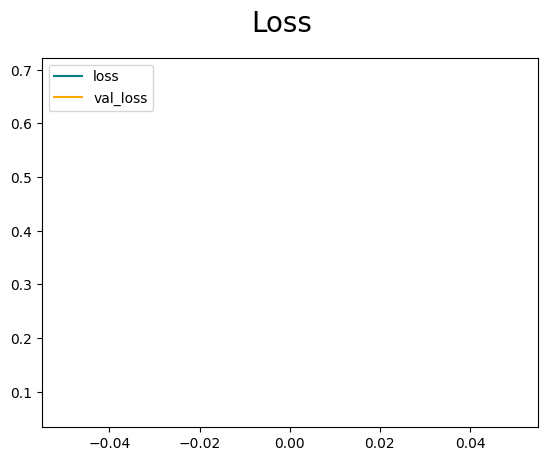

In [19]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

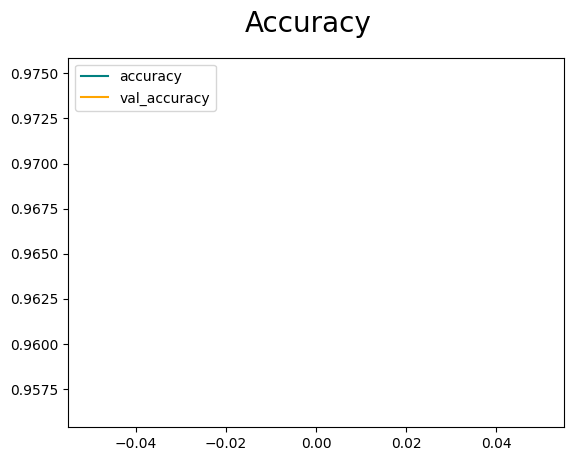

In [20]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()